# Import Libraries

In [58]:
from google.colab import drive
drive.mount('/content/drive')
import os
import shutil
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Brain Tumor Image Dataset Merger

In [59]:
class MoveImages:
  def __init__(self, raw_dataset_path, interim_dataset_path, lookfor, out):
    self.raw_dataset_path = raw_dataset_path
    self.interim_dataset_path = interim_dataset_path
    self.lookfor = lookfor
    self.out = out
    self.valid_extensions = {".png", ".jpg", ".jpeg"}

  def get_all_folders(self, path):
    folders = [path]
    for item in os.listdir(path):
      full_path = os.path.join(path, item)
      if os.path.isdir(full_path):
        folders.extend(self.get_all_folders(full_path))
    return folders

  def get_specific_paths(self, word):
    matched = []
    all_folders = self.get_all_folders(self.raw_dataset_path)
    for fol in all_folders:
      if word.lower() in fol.lower():
        matched.append(fol)
    return matched

  def make_merged_directory(self, name):
    merged_folder = os.path.join(self.interim_dataset_path, name)
    os.makedirs(merged_folder, exist_ok=True)
    return merged_folder

  def copy_unique_files(self, src_folder, dest_folder):
    for filename in os.listdir(src_folder):
      src_file = os.path.join(src_folder, filename)
      if os.path.isfile(src_file) and os.path.splitext(filename)[1].lower() in self.valid_extensions:
        dest_file = os.path.join(dest_folder, filename)
        if not os.path.exists(dest_file):
          shutil.copy2(src_file, dest_file)
        else:
          # print(f"Duplicate skipped: {filename}")
          pass

  def do_all_processes(self):
    for word in self.lookfor:
      print(f"\nProcessing class: {word}")
      out_folder_path = os.path.join(word, self.out)
      # merged_folder = self.make_merged_directory(out_folder_path)
      source_folders = self.get_specific_paths(word)

      for src in source_folders:
        # self.copy_unique_files(src, merged_folder)
        print(f"✔ Copied from {src}")

      print(f"Pasted to {os.path.join(self.interim_dataset_path, out_folder_path)}")

In [60]:
raw_mri_dataset_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/mri"
interim_mri_dataset_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/mri"
mover = MoveImages(raw_mri_dataset_path, interim_mri_dataset_path, lookfor=["glioma", "meningioma", "no tumor", "pituitary"], out="original")
mover.do_all_processes()


Processing class: glioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/mri/Testing/glioma_testing
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/mri/Glioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/mri/Validation/Glioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/mri/Top View(Glioma)
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/mri/Top View Validation/Glioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/mri/Top View Testing/Glioma
Pasted to /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/mri/glioma/original

Processing class: meningioma
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/mri/Testing/meningioma_testing
✔ Copied from /content/drive/MyDrive/Cola

In [61]:
merged_glioma_len = len(os.listdir(os.path.join(interim_mri_dataset_path, "glioma/original")))
merged_meningioma_len = len(os.listdir(os.path.join(interim_mri_dataset_path, "meningioma/original")))
merged_no_tumor_len = len(os.listdir(os.path.join(interim_mri_dataset_path, "no_tumor/original")))
merged_pituitary_len = len(os.listdir(os.path.join(interim_mri_dataset_path, "pituitary/original")))
total_merged_images = merged_glioma_len + merged_meningioma_len + merged_no_tumor_len + merged_pituitary_len

print("merged_glioma_len:", merged_glioma_len)
print("merged_meningioma_len:", merged_meningioma_len)
print("merged_no_tumor_len:", merged_no_tumor_len)
print("merged_pituitary_len:", merged_pituitary_len)
print("total_merged_images:", total_merged_images)

merged_glioma_len: 10209
merged_meningioma_len: 10346
merged_no_tumor_len: 1840
merged_pituitary_len: 8203
total_merged_images: 30598


In [62]:
mri_data = {"merged_glioma": merged_glioma_len,
            "merged_meningioma": merged_meningioma_len,
            "merged_no_tumor": merged_no_tumor_len,
            "merged_pituitary": merged_pituitary_len}

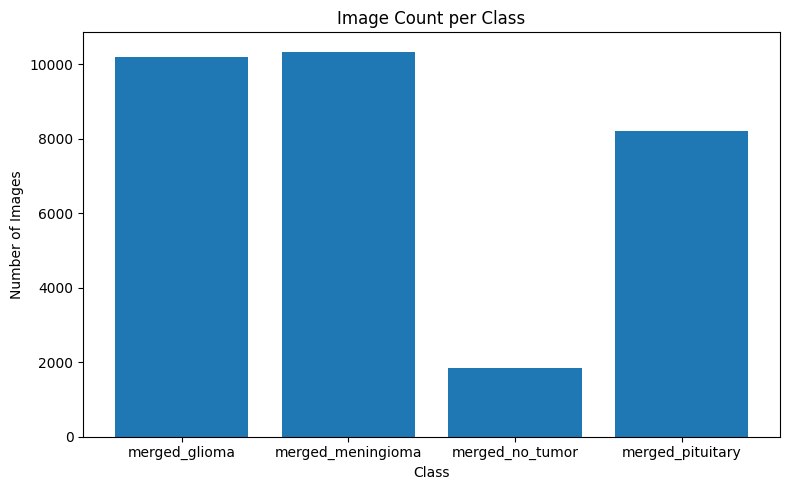

In [63]:
plt.figure(figsize=(8, 5))
plt.bar(mri_data.keys(), mri_data.values())
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

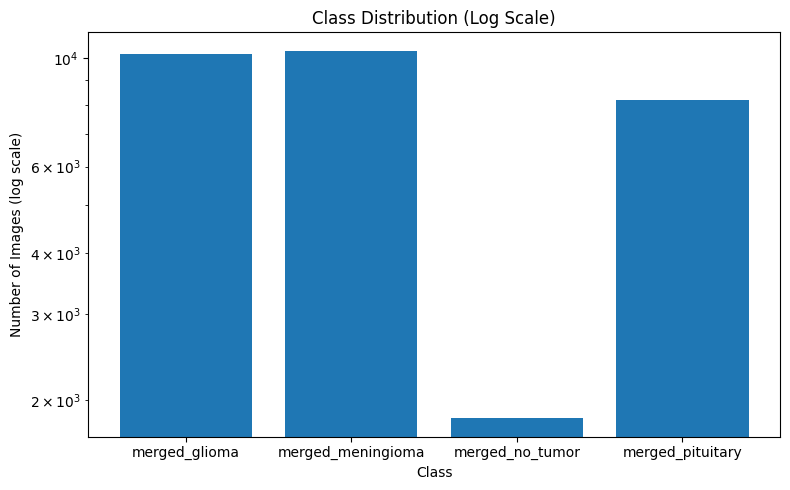

In [64]:
plt.figure(figsize=(8, 5))
plt.bar(mri_data.keys(), mri_data.values())
plt.yscale("log")
plt.xlabel("Class")
plt.ylabel("Number of Images (log scale)")
plt.title("Class Distribution (Log Scale)")
plt.tight_layout()
plt.show()

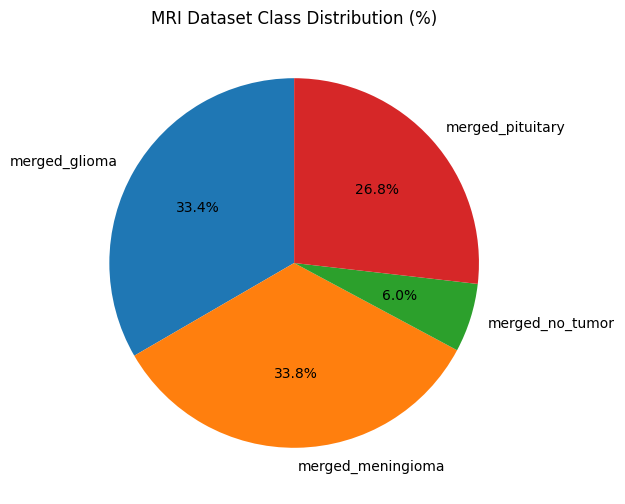

In [65]:
plt.figure(figsize=(6, 6))
plt.pie(mri_data.values(), labels=mri_data.keys(), autopct="%1.1f%%", startangle=90)
plt.title("MRI Dataset Class Distribution (%)")
plt.show()

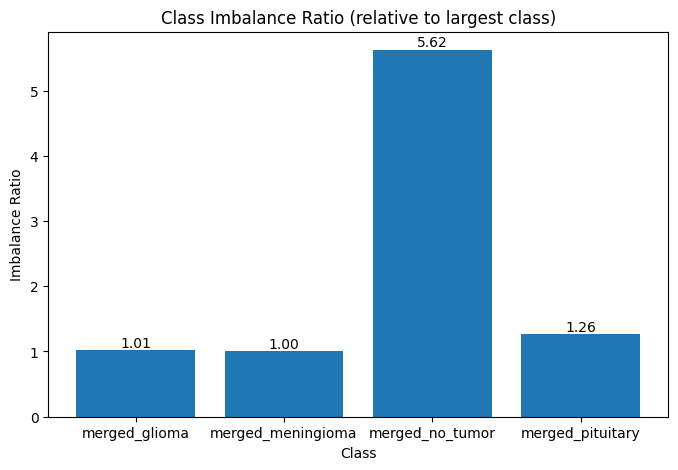

In [66]:
max_count = max(mri_data.values())
imbalance_ratio = [max_count / c for c in mri_data.values()]

plt.figure(figsize=(8, 5))
plt.bar(mri_data.keys(), imbalance_ratio)
plt.title("Class Imbalance Ratio (relative to largest class)")
plt.ylabel("Imbalance Ratio")
plt.xlabel("Class")
for i, v in enumerate(imbalance_ratio):
  plt.text(i, v + 0.05, f"{v:.2f}", ha="center")
plt.show()

In [67]:
raw_ct_dataset_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/ct"
interim_ct_dataset_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/ct"
moverct = MoveImages(raw_ct_dataset_path, interim_ct_dataset_path, lookfor=["normal", "tumor"], out="original")
moverct.do_all_processes()


Processing class: normal
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/ct/normal
Pasted to /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/ct/normal/original

Processing class: tumor
✔ Copied from /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/raw/ct/tumor
Pasted to /content/drive/MyDrive/Colab Notebooks/Data Science Group Project/data/interim/ct/tumor/original


In [68]:
moved_normal_len = len(os.listdir(os.path.join(interim_ct_dataset_path, "normal/original")))
moved_tumor_len = len(os.listdir(os.path.join(interim_ct_dataset_path, "tumor/original")))
total_moved_images = moved_normal_len + moved_tumor_len

print("moved_normal_len:", moved_normal_len)
print("moved_tumor_len:", moved_tumor_len)
print("total_moved_images:", total_moved_images)

moved_normal_len: 2300
moved_tumor_len: 2325
total_moved_images: 4625


In [69]:
ct_data = {"normal": moved_normal_len,
           "tumor": moved_tumor_len}

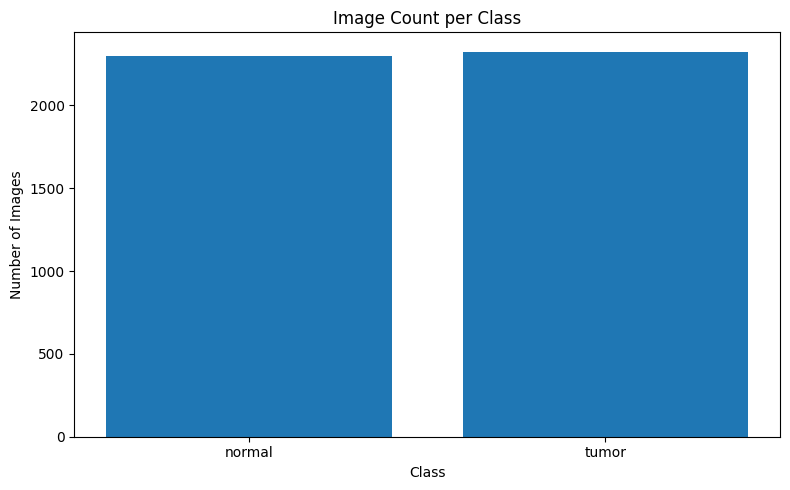

In [70]:
plt.figure(figsize=(8, 5))
plt.bar(ct_data.keys(), ct_data.values())
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

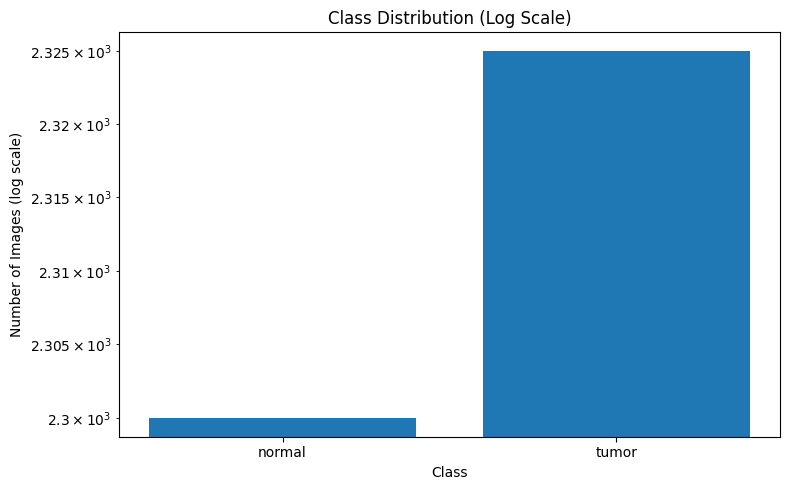

In [71]:
plt.figure(figsize=(8, 5))
plt.bar(ct_data.keys(), ct_data.values())
plt.yscale("log")
plt.xlabel("Class")
plt.ylabel("Number of Images (log scale)")
plt.title("Class Distribution (Log Scale)")
plt.tight_layout()
plt.show()

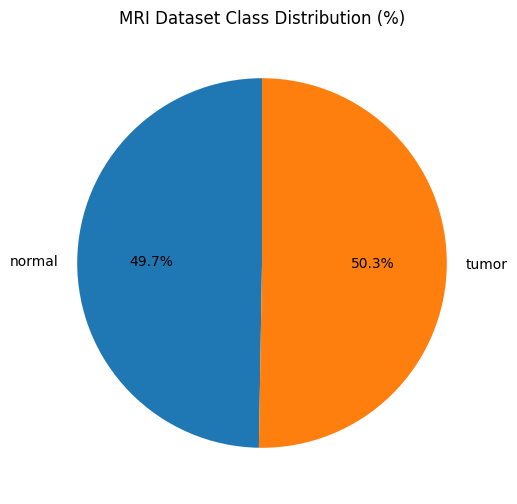

In [72]:
plt.figure(figsize=(6, 6))
plt.pie(ct_data.values(), labels=ct_data.keys(), autopct="%1.1f%%", startangle=90)
plt.title("MRI Dataset Class Distribution (%)")
plt.show()

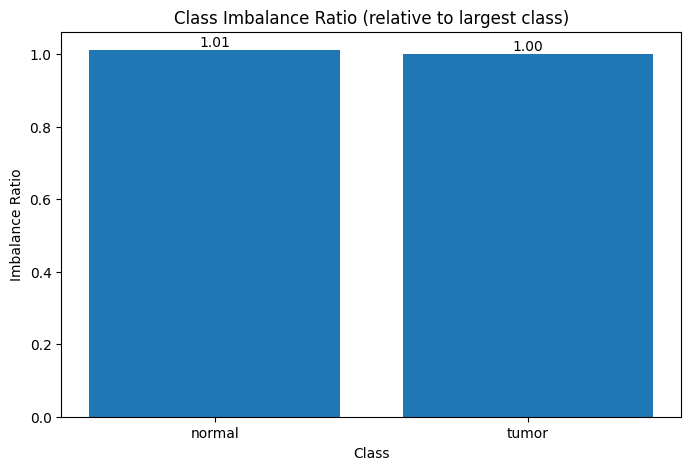

In [73]:
max_count = max(ct_data.values())
imbalance_ratio = [max_count / c for c in ct_data.values()]

plt.figure(figsize=(8, 5))
plt.bar(ct_data.keys(), imbalance_ratio)
plt.title("Class Imbalance Ratio (relative to largest class)")
plt.ylabel("Imbalance Ratio")
plt.xlabel("Class")
for i, v in enumerate(imbalance_ratio):
  plt.text(i, v + 0.01, f"{v:.2f}", ha="center")
plt.show()